In [1]:
# TODO
# Estudiar contadores con lecturas negativas y con lecturas=0 (ID-wise)
# Buscar outliers (ID-wise)
# Checkear las que no son monotonicas ascendentes
# Repetir la gráfica de todas las medidas graficando una por una en el mismo plot

# Done
# Buscar missing values (Solo faltan valores en las lecturas decimales)
# Rellenar missing values (Solo hay Nans en los decimales, se rellenan con ceros)

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import tqdm
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

In [2]:
# Paths to main file
data_folder = Path("../Data/")
dataset_path = os.path.join(data_folder, "Modelar_UH2022.txt")

In [3]:
# Read file
df = pd.read_csv(dataset_path, sep="|")
df.head()

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
0,0,2019-06-13 08:34:09,369320,0.0,17,0.0
1,0,2019-06-13 17:34:10,369403,0.0,2,0.0
2,0,2019-06-13 18:34:10,369403,0.0,0,0.0
3,0,2019-06-13 04:34:10,369284,0.0,1,0.0
4,0,2019-06-13 14:34:10,369356,0.0,28,0.0


In [4]:
df["SAMPLETIME"] = pd.to_datetime(df["SAMPLETIME"], utc=True)
df.head()

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
0,0,2019-06-13 08:34:09+00:00,369320,0.0,17,0.0
1,0,2019-06-13 17:34:10+00:00,369403,0.0,2,0.0
2,0,2019-06-13 18:34:10+00:00,369403,0.0,0,0.0
3,0,2019-06-13 04:34:10+00:00,369284,0.0,1,0.0
4,0,2019-06-13 14:34:10+00:00,369356,0.0,28,0.0


In [6]:
df.dtypes

ID                                 int64
SAMPLETIME           datetime64[ns, UTC]
READINGINTEGER                     int64
READINGTHOUSANDTH                float64
DELTAINTEGER                       int64
DELTATHOUSANDTH                  float64
dtype: object

In [7]:
df.describe()

,ID,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
count,2.140483e+07,2.140483e+07,2.126477e+07,2.140483e+07,2.126477e+07
mean,1.259029e+03,6.052178e+05,3.930737e+00,2.277017e+01,4.228367e+00
std,7.334956e+02,2.857464e+06,1.496893e+01,1.516794e+03,1.541059e+01
min,0.000000e+00,-6.407800e+04,0.000000e+00,-5.307340e+05,0.000000e+00
25%,6.230000e+02,6.368800e+04,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.255000e+03,1.831570e+05,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.887000e+03,3.520500e+05,0.000000e+00,9.000000e+00,0.000000e+00
max,2.756000e+03,5.108976e+07,9.900000e+01,9.499810e+05,9.900000e+01


Min: -64078, Max: -8345


<AxesSubplot:xlabel='READINGINTEGER'>

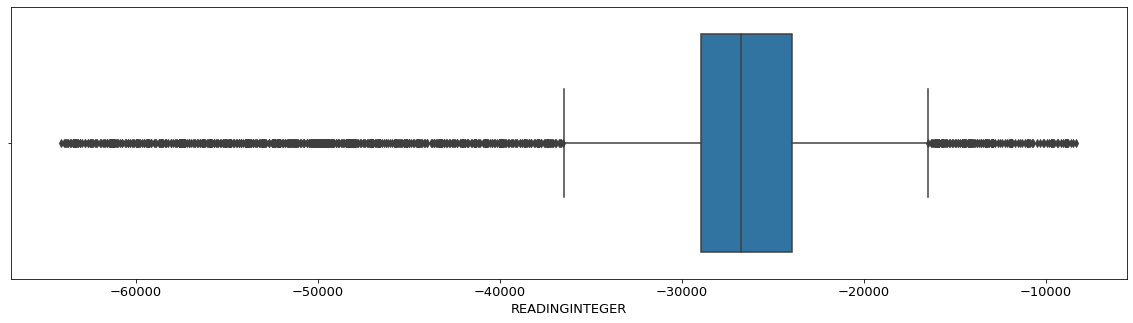

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
temp = df[df["READINGINTEGER"] < 0]
print(f"Min: {temp.READINGINTEGER.min()}, Max: {temp.READINGINTEGER.max()}")
sns.boxplot(data=temp, x="READINGINTEGER", ax=ax)

In [9]:
df.count() / df.count() * 100

ID                   100.0
SAMPLETIME           100.0
READINGINTEGER       100.0
READINGTHOUSANDTH    100.0
DELTAINTEGER         100.0
DELTATHOUSANDTH      100.0
dtype: float64

In [10]:
df[df["READINGINTEGER"] == 0].count() / df.count() * 100

ID                   0.221422
SAMPLETIME           0.221422
READINGINTEGER       0.221422
READINGTHOUSANDTH    0.222880
DELTAINTEGER         0.221422
DELTATHOUSANDTH      0.222880
dtype: float64

In [11]:
df[df["READINGINTEGER"] < 0].count() / df.count() * 100

ID                   0.053862
SAMPLETIME           0.053862
READINGINTEGER       0.053862
READINGTHOUSANDTH    0.054216
DELTAINTEGER         0.053862
DELTATHOUSANDTH      0.054216
dtype: float64

In [12]:
df[df["READINGINTEGER"] < 0]

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
8892823,1041,2019-06-13 05:00:00+00:00,-27618,0.0,0,0.0
8892824,1041,2019-06-13 20:38:40+00:00,-27602,0.0,5,0.0
8892825,1041,2019-06-13 02:38:44+00:00,-27618,0.0,0,0.0
8892826,1041,2019-06-13 01:38:44+00:00,-27618,0.0,0,0.0
8892827,1041,2019-06-13 23:38:43+00:00,-27602,0.0,0,0.0
...,...,...,...,...,...,...
21396595,2711,2019-12-18 22:22:24+00:00,-59328,0.0,0,0.0
21396596,2711,2019-12-19 18:22:22+00:00,-57343,0.0,139,0.0
21396597,2711,2019-12-19 20:22:22+00:00,-57325,0.0,0,0.0
21396598,2711,2020-01-11 04:21:35+00:00,-39967,0.0,1,0.0


In [13]:
df[df["READINGINTEGER"] == 0]

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
2318855,272,2019-06-13 04:27:57+00:00,0,0.0,0,0.0
2318856,272,2019-06-13 20:27:57+00:00,0,0.0,0,0.0
2318857,272,2019-06-13 12:27:56+00:00,0,0.0,0,0.0
2318858,272,2019-06-13 15:27:57+00:00,0,0.0,0,0.0
2318859,272,2019-06-13 23:27:57+00:00,0,0.0,0,0.0
...,...,...,...,...,...,...
21349477,2690,2019-05-08 10:57:06+00:00,0,0.0,0,0.0
21349478,2690,2019-05-08 03:00:00+00:00,0,0.0,0,0.0
21349479,2690,2019-05-08 08:57:06+00:00,0,0.0,0,0.0
21349655,2690,2019-05-08 00:57:07+00:00,0,0.0,0,0.0


In [14]:
# Contadores que tiene lecturas negativas
df[df["READINGINTEGER"] < 0].ID.unique()

array([1041, 2711])

In [15]:
# Contadores que tienen lecturas igual a cero
df[df["READINGINTEGER"] == 0].ID.unique()

array([ 272,  323,  461,  549, 1225, 1261, 1506, 1837, 1896, 2001, 2089,
       2135, 2231, 2369, 2542, 2544, 2545, 2547, 2690])

Min: 1.0, Max: 99.0


<AxesSubplot:xlabel='READINGTHOUSANDTH'>

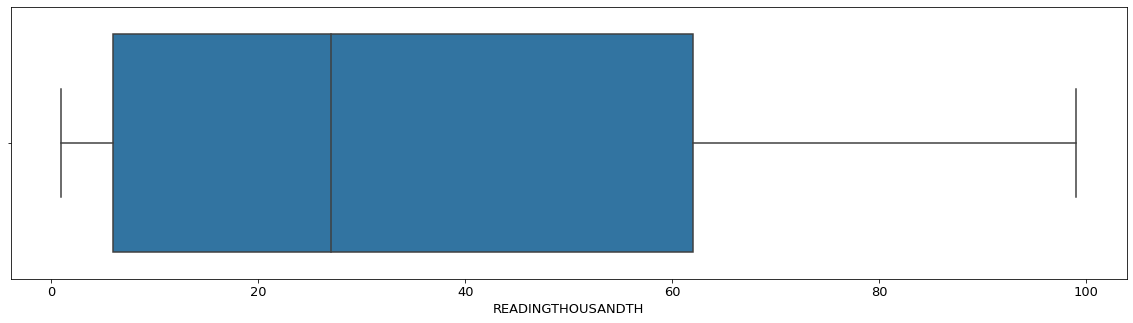

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
temp = df[df["READINGTHOUSANDTH"] != 0]
print(f"Min: {temp.READINGTHOUSANDTH.min()}, Max: {temp.READINGTHOUSANDTH.max()}")
sns.boxplot(data=temp, x="READINGTHOUSANDTH", ax=ax)

Min: -530734, Max: -1


<AxesSubplot:xlabel='DELTAINTEGER'>

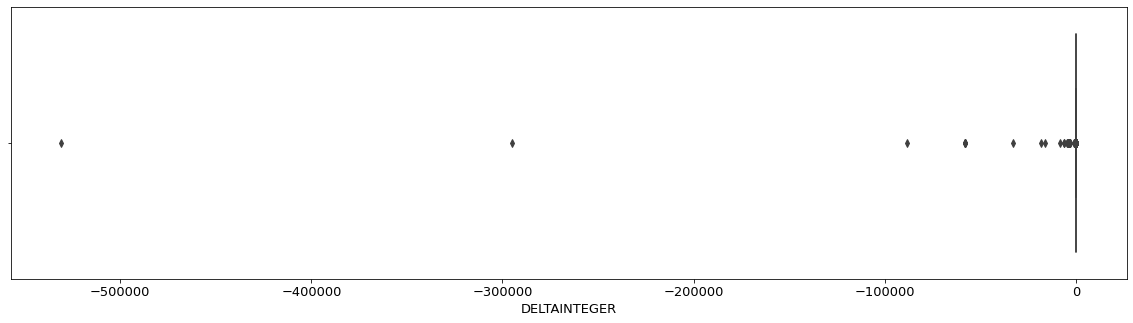

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
temp = df[df["DELTAINTEGER"] < 0]
print(f"Min: {temp.DELTAINTEGER.min()}, Max: {temp.DELTAINTEGER.max()}")
sns.boxplot(data=temp, x="DELTAINTEGER", ax=ax)

Min: 1.0, Max: 99.0


<AxesSubplot:xlabel='DELTATHOUSANDTH'>

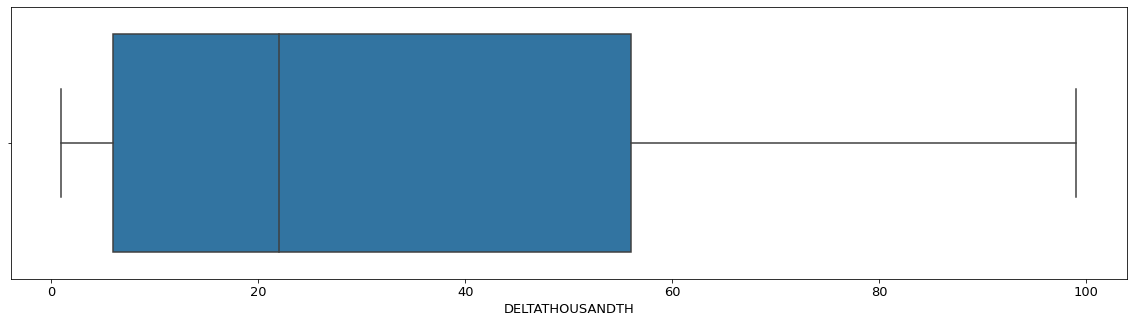

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
temp = df[df["DELTATHOUSANDTH"] != 0]
print(f"Min: {temp.DELTATHOUSANDTH.min()}, Max: {temp.DELTATHOUSANDTH.max()}")
sns.boxplot(data=temp, x="DELTATHOUSANDTH", ax=ax)

In [18]:
df[df["DELTAINTEGER"] < 0].count() / df.count() * 100

ID                   0.040425
SAMPLETIME           0.040425
READINGINTEGER       0.040425
READINGTHOUSANDTH    0.040692
DELTAINTEGER         0.040425
DELTATHOUSANDTH      0.040692
dtype: float64

In [17]:
df[df["DELTAINTEGER"] < 0]

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
32172,3,2019-05-10 11:44:54+00:00,193908,0.0,-1,0.0
62348,7,2019-04-25 12:36:10+00:00,200780,0.0,-1,0.0
62351,7,2019-04-25 11:36:10+00:00,200781,0.0,-4,0.0
66829,7,2019-04-25 13:36:10+00:00,200779,0.0,-1,0.0
83620,9,2019-05-24 01:32:09+00:00,211841,0.0,-5,0.0
...,...,...,...,...,...,...
21396538,2711,2019-12-16 13:22:30+00:00,-63961,0.0,-107,0.0
21396539,2711,2019-12-16 12:22:29+00:00,-63854,0.0,-118,0.0
21396542,2711,2019-12-16 09:22:29+00:00,-63453,0.0,-74,0.0
21396544,2711,2019-12-16 08:22:31+00:00,-63379,0.0,-24,0.0


Porcentaje de incrementos negativos correspondientes a los dos contadores con lecturas negativas:
ID                   10.516584
SAMPLETIME           10.516584
READINGINTEGER       10.516584
READINGTHOUSANDTH    10.516584
DELTAINTEGER         10.516584
DELTATHOUSANDTH      10.516584
dtype: float64

Porcentaje de valores negativos en contadores buenos mayores que -5:
ID                   93.232597
SAMPLETIME           93.232597
READINGINTEGER       93.232597
READINGTHOUSANDTH    93.232597
DELTAINTEGER         93.232597
DELTATHOUSANDTH      93.232597
dtype: float64

Maximos incrementos negativo fuera de los contadores con lecturas negativas:


<AxesSubplot:xlabel='DELTAINTEGER', ylabel='ID'>

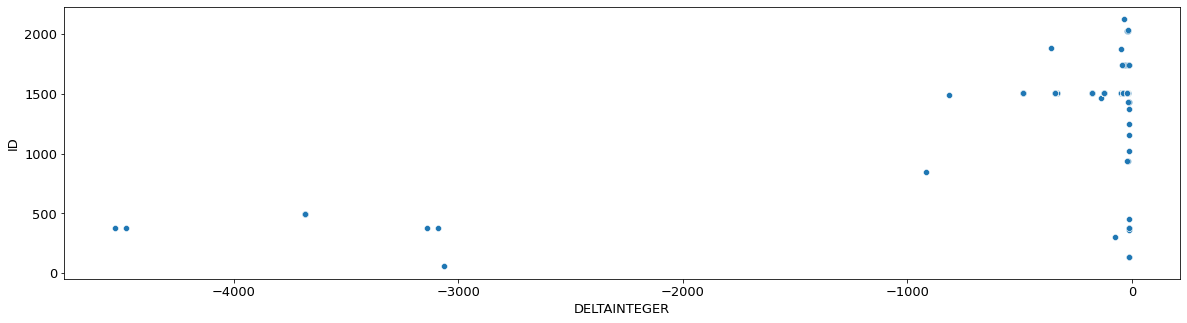

In [57]:
# Que porcentaje de los valores negativos pertenece a los contadores con lecturas negativas?
temp = df.copy()
temp = temp[temp["ID"] != 1041]
temp = temp[temp["ID"] != 2711]
print("Porcentaje de incrementos negativos correspondientes a los dos contadores con lecturas negativas:")
print((df[df["DELTAINTEGER"] < 0].count() - temp[temp["DELTAINTEGER"] < 0].count())/df[df["DELTAINTEGER"] < 0].count() * 100)
print()
# Cual es el porcentaje de valores negativos en contadores "buenos" mayores que x
print("Porcentaje de valores negativos en contadores buenos mayores que -5:")
print((temp[temp["DELTAINTEGER"] < 0].count() - temp[temp["DELTAINTEGER"] < -5].count()) / temp[temp["DELTAINTEGER"] < 0].count() * 100)
print()
# Cual es el máximo incremento negativo en los contadores "buenos"
print("Maximos incrementos negativo fuera de los contadores con lecturas negativas:")
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
temp = temp[temp["DELTAINTEGER"] < -10]
temp = temp[temp["DELTAINTEGER"] > -5000]
sns.scatterplot(data=temp, x="DELTAINTEGER", y="ID", ax=ax)

# Cuantos incrementos negativos hay por contador "bueno"

In [16]:
# Contadores que tienen incrementos negativos
df[df["DELTAINTEGER"] < 0].ID.unique()

array([   3,    7,    9,   14,   19,   23,   32,   39,   56,   57,   58,
         59,   72,   76,   80,   81,   88,   91,   95,   96,  102,  109,
        119,  136,  137,  138,  147,  153,  155,  157,  167,  172,  189,
        198,  201,  204,  206,  212,  216,  217,  232,  256,  269,  270,
        273,  281,  285,  297,  298,  301,  303,  308,  310,  312,  316,
        318,  323,  325,  327,  328,  337,  357,  365,  368,  373,  374,
        378,  379,  380,  381,  383,  389,  394,  395,  398,  399,  419,
        433,  450,  454,  457,  459,  465,  471,  473,  477,  478,  479,
        482,  487,  489,  493,  496,  498,  503,  507,  514,  524,  533,
        540,  551,  552,  554,  555,  556,  557,  564,  565,  576,  584,
        587,  590,  595,  596,  600,  608,  615,  621,  629,  630,  635,
        636,  647,  653,  654,  662,  667,  669,  674,  675,  678,  683,
        686,  689,  690,  692,  694,  695,  698,  703,  705,  716,  717,
        720,  731,  735,  738,  742,  743,  751,  7

In [68]:
for id_ in df["ID"].unique():
    temp = df[df["ID"] == id_]
    temp = temp.sort_values(by="SAMPLETIME")
    if temp.SAMPLETIME.iloc[-1].month != 1 or temp.SAMPLETIME.iloc[-1].day != 31:
        print(id_, temp.SAMPLETIME.iloc[-1])

116 2020-01-26 06:05:25+00:00
167 2020-01-24 01:17:34+00:00
209 2019-09-12 04:22:26+00:00
231 2020-01-21 15:20:27+00:00
260 2020-01-28 07:03:50+00:00
293 2020-01-26 16:49:41+00:00
371 2020-01-25 03:23:34+00:00
386 2020-01-29 21:51:57+00:00
438 2019-12-24 17:54:06+00:00
441 2020-01-22 03:39:30+00:00
525 2020-01-23 10:46:34+00:00
654 2020-01-29 04:48:10+00:00
795 2019-11-24 23:42:28+00:00
813 2020-01-30 06:45:37+00:00
860 2020-01-29 04:26:57+00:00
969 2020-01-30 03:00:07+00:00
1022 2020-01-23 15:26:43+00:00
1133 2020-01-26 06:52:02+00:00
1174 2020-01-27 08:57:28+00:00
1247 2020-01-26 01:56:47+00:00
1338 2020-01-19 05:33:18+00:00
1367 2019-09-25 22:16:52+00:00
1501 2020-01-29 14:56:49+00:00
1585 2020-01-23 15:48:55+00:00
1661 2020-01-27 06:08:20+00:00
1663 2020-01-30 21:00:15+00:00
1755 2020-01-27 23:13:29+00:00
1758 2019-12-27 22:30:06+00:00
1780 2020-01-19 10:10:13+00:00
1783 2020-01-25 13:51:17+00:00
1799 2020-01-24 21:32:52+00:00
1860 2020-01-14 07:14:44+00:00
1893 2020-01-28 04:06:12

In [71]:
id_list = []
for id_ in df["ID"].unique():
    temp = df[df["ID"] == id_]
    temp = temp.sort_values(by="SAMPLETIME")
    if temp.SAMPLETIME.iloc[-1].month != 1 or temp.SAMPLETIME.iloc[-1].day != 31:
        id_list.append(id_)
print(id_list)

[116, 167, 209, 231, 260, 293, 371, 386, 438, 441, 525, 654, 795, 813, 860, 969, 1022, 1133, 1174, 1247, 1338, 1367, 1501, 1585, 1661, 1663, 1755, 1758, 1780, 1783, 1799, 1860, 1893, 1933, 1966, 1981, 1994, 1997, 2041, 2116, 2142, 2202, 2207, 2260, 2265, 2408, 2410, 2412, 2414, 2418, 2419, 2420, 2423, 2424, 2428, 2433, 2435, 2438, 2439, 2441, 2442, 2451, 2452, 2453, 2484, 2491, 2492, 2493, 2508, 2510, 2514, 2517, 2518, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2536, 2537, 2538, 2539, 2540, 2543, 2557, 2569, 2604, 2605, 2618, 2631, 2690, 2713, 2714, 2716, 2719, 2720, 2721, 2722, 2723, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2756]


In [69]:
for id_ in df["ID"].unique():
    temp = df[df["ID"] == id_]
    temp = temp.sort_values(by="SAMPLETIME")
    if temp.SAMPLETIME.iloc[0].month != 2 or temp.SAMPLETIME.iloc[0].day != 1:
        print(id_, temp.SAMPLETIME.iloc[0])

23 2019-02-04 01:24:55+00:00
26 2019-05-08 14:37:19+00:00
32 2019-04-06 21:21:56+00:00
34 2019-05-08 14:44:29+00:00
35 2019-05-10 14:49:01+00:00
39 2019-05-13 12:08:19+00:00
54 2019-05-07 14:32:30+00:00
62 2019-02-15 11:14:38+00:00
72 2019-05-06 16:20:23+00:00
74 2019-05-13 15:58:51+00:00
76 2019-05-07 16:27:28+00:00
78 2019-02-02 23:12:34+00:00
79 2019-04-06 21:45:55+00:00
85 2019-03-26 12:34:18+00:00
113 2019-03-13 12:41:09+00:00
116 2019-02-05 03:27:31+00:00
135 2019-05-10 13:51:05+00:00
136 2019-05-20 16:05:31+00:00
145 2019-05-06 14:44:42+00:00
155 2019-05-06 14:34:04+00:00
159 2019-03-13 16:39:59+00:00
167 2019-02-03 22:32:55+00:00
185 2019-03-26 15:03:33+00:00
192 2019-05-10 16:45:04+00:00
193 2019-05-13 11:37:41+00:00
199 2019-05-10 14:40:51+00:00
203 2019-05-13 11:52:17+00:00
206 2019-05-15 11:42:35+00:00
209 2019-02-04 00:28:54+00:00
226 2019-02-05 03:59:44+00:00
231 2019-02-18 04:30:16+00:00
233 2019-05-13 15:33:14+00:00
234 2019-05-07 16:28:21+00:00
237 2019-05-10 17:36:16+

2517 2019-02-02 20:54:01+00:00
2518 2019-02-02 11:31:44+00:00
2519 2019-02-03 04:13:36+00:00
2520 2019-02-03 02:14:49+00:00
2521 2019-02-04 13:53:19+00:00
2522 2019-02-04 00:52:19+00:00
2523 2019-02-05 12:32:02+00:00
2524 2019-02-05 12:40:43+00:00
2525 2019-02-06 11:42:24+00:00
2526 2019-02-06 08:03:29+00:00
2527 2019-02-06 21:33:45+00:00
2528 2019-02-06 01:55:03+00:00
2529 2019-02-06 01:02:40+00:00
2530 2019-06-29 15:04:57+00:00
2531 2019-02-11 01:49:18+00:00
2532 2019-04-05 16:04:28+00:00
2533 2019-06-24 20:46:36+00:00
2534 2019-03-26 13:14:00+00:00
2535 2019-04-09 16:39:39+00:00
2536 2019-03-05 22:09:35+00:00
2537 2019-07-05 03:44:23+00:00
2538 2019-02-13 06:17:14+00:00
2539 2019-03-06 13:22:05+00:00
2540 2019-03-06 15:36:09+00:00
2541 2019-02-18 14:13:56+00:00
2542 2019-07-08 09:59:52+00:00
2543 2019-06-01 16:28:23+00:00
2544 2019-07-08 10:00:17+00:00
2545 2019-07-08 10:00:18+00:00
2546 2019-03-26 00:40:38+00:00
2547 2019-07-11 11:00:09+00:00
2548 2019-07-11 13:00:13+00:00
2549 201

In [72]:
id_list = []
for id_ in df["ID"].unique():
    temp = df[df["ID"] == id_]
    temp = temp.sort_values(by="SAMPLETIME")
    if temp.SAMPLETIME.iloc[0].month != 2 or temp.SAMPLETIME.iloc[0].day != 1:
        id_list.append(id_)
print(id_list)

[23, 26, 32, 34, 35, 39, 54, 62, 72, 74, 76, 78, 79, 85, 113, 116, 135, 136, 145, 155, 159, 167, 185, 192, 193, 199, 203, 206, 209, 226, 231, 233, 234, 237, 242, 243, 279, 299, 311, 312, 316, 322, 323, 345, 347, 360, 404, 414, 418, 420, 426, 438, 449, 450, 455, 457, 461, 472, 476, 478, 489, 493, 514, 526, 549, 557, 565, 571, 577, 581, 595, 605, 622, 624, 626, 630, 655, 659, 661, 664, 671, 700, 712, 725, 737, 746, 762, 775, 777, 782, 795, 807, 813, 815, 824, 825, 833, 872, 880, 884, 885, 899, 914, 918, 931, 937, 938, 950, 953, 981, 996, 997, 1018, 1043, 1064, 1069, 1072, 1119, 1133, 1135, 1138, 1141, 1152, 1170, 1174, 1178, 1182, 1187, 1193, 1210, 1222, 1225, 1233, 1236, 1244, 1253, 1258, 1261, 1278, 1314, 1324, 1333, 1336, 1342, 1366, 1372, 1401, 1409, 1417, 1423, 1425, 1427, 1429, 1445, 1446, 1447, 1449, 1493, 1503, 1507, 1514, 1530, 1546, 1556, 1567, 1579, 1620, 1622, 1632, 1646, 1669, 1672, 1674, 1678, 1679, 1683, 1701, 1710, 1737, 1745, 1748, 1759, 1766, 1777, 1778, 1784, 1796, 180

In [6]:
# Contadores con menos datos de los especificados
# HAY MUCHOS MISSING VALUES, ESTO AFECTA A LAS AGRUPACIONES EN DIAS
for id_ in df["ID"].unique():
    temp = df[df["ID"] == id_]
    count = len(temp.index)
    if count < 8759:
        print(id_, count)

11 6383
23 8210
26 6442
32 7203
33 8211
34 6442
35 6394
37 5703
39 6324
54 6466
62 8412
64 7991
67 8379
72 6488
73 8423
74 6321
76 6464
78 8248
79 7203
85 7475
112 8651
113 7787
116 2000
135 6395
136 6152
138 8059
145 6490
155 6490
159 7783
167 4468
185 7472
192 6392
193 6325
199 6394
203 6325
206 6277
209 5284
210 8527
215 8659
223 8647
226 8364
231 4704
233 6321
234 6464
237 6391
241 8435
242 8416
243 6488
254 7955
260 8551
261 7191
271 8639
279 6323
284 8287
293 5193
299 7786
311 6444
312 5777
313 8499
316 6444
322 6490
323 6393
325 8741
330 8523
345 6821
347 6490
351 7256
360 8315
361 8327
371 8595
386 8589
404 6323
406 8655
414 8290
418 6227
420 6438
426 6274
438 248
441 2983
449 6276
450 6276
454 7491
455 6438
457 8579
461 6438
466 8655
472 7161
476 7446
478 6442
489 6394
493 7719
501 8335
514 6438
525 6295
526 6487
549 6444
557 7784
565 8579
571 5917
577 7202
581 6393
584 8663
595 7787
605 2998
615 8191
618 8623
622 6488
624 6296
626 5817
630 6488
644 7476
651 8635
654 6289
655 

In [20]:
# How many water meters are in the dataset?
len(df["ID"].unique())

2747

In [21]:
# Is any entry repeated?
df.value_counts()

ID    SAMPLETIME                 READINGINTEGER  READINGTHOUSANDTH  DELTAINTEGER  DELTATHOUSANDTH
0     2019-02-01 00:39:36+00:00  331710          0.0                0             0.0                1
1681  2019-03-19 17:59:28+00:00  808228          0.0                164           0.0                1
      2019-03-20 11:59:24+00:00  808703          0.0                1             0.0                1
      2019-03-20 10:59:27+00:00  808702          0.0                0             0.0                1
      2019-03-20 09:59:27+00:00  808702          0.0                81            0.0                1
                                                                                                    ..
840   2019-08-14 15:35:35+00:00  254826          0.0                4             0.0                1
      2019-08-14 14:35:35+00:00  254822          0.0                1             0.0                1
      2019-08-14 13:35:35+00:00  254821          0.0                6         

In [22]:
df.isna().sum()

ID                        0
SAMPLETIME                0
READINGINTEGER            0
READINGTHOUSANDTH    140056
DELTAINTEGER              0
DELTATHOUSANDTH      140056
dtype: int64

In [23]:
df[df.isnull().any(axis=1)].ID.unique()

array([ 248,  292,  545, 1416])

In [24]:
df[df.isnull().any(axis=1)]

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
2085142,248,2019-06-13 18:30:00+00:00,26752630,NaN,0,NaN
2085143,248,2019-06-13 04:30:00+00:00,26676570,NaN,3290,NaN
2085144,248,2019-06-13 16:30:00+00:00,26752630,NaN,0,NaN
2085145,248,2019-06-13 18:45:00+00:00,26752630,NaN,0,NaN
2085146,248,2019-06-13 09:45:00+00:00,26736300,NaN,2780,NaN
...,...,...,...,...,...,...
12101320,1416,2020-01-25 11:00:00+00:00,30935150,NaN,250,NaN
12101321,1416,2020-01-25 09:30:00+00:00,30933640,NaN,260,NaN
12101322,1416,2020-01-25 16:00:00+00:00,30940130,NaN,250,NaN
12101323,1416,2020-01-26 06:00:00+00:00,30954430,NaN,270,NaN


As there is no nan values in the integers, all missing decimals can be neglected (set to zero)

In [25]:
df.fillna(0, inplace=True)

In [26]:
df.isna().sum()

ID                   0
SAMPLETIME           0
READINGINTEGER       0
READINGTHOUSANDTH    0
DELTAINTEGER         0
DELTATHOUSANDTH      0
dtype: int64

In [27]:
df.select_dtypes('float').index[np.isinf(df.select_dtypes('float')).any(1)]

Int64Index([], dtype='int64')

In [28]:
# Group readings
df["READING"] = df["READINGINTEGER"] + df["READINGTHOUSANDTH"]/100
df["DELTA"] = df["DELTAINTEGER"] + df["DELTATHOUSANDTH"]/100

<AxesSubplot:xlabel='READINGINTEGER', ylabel='ID'>

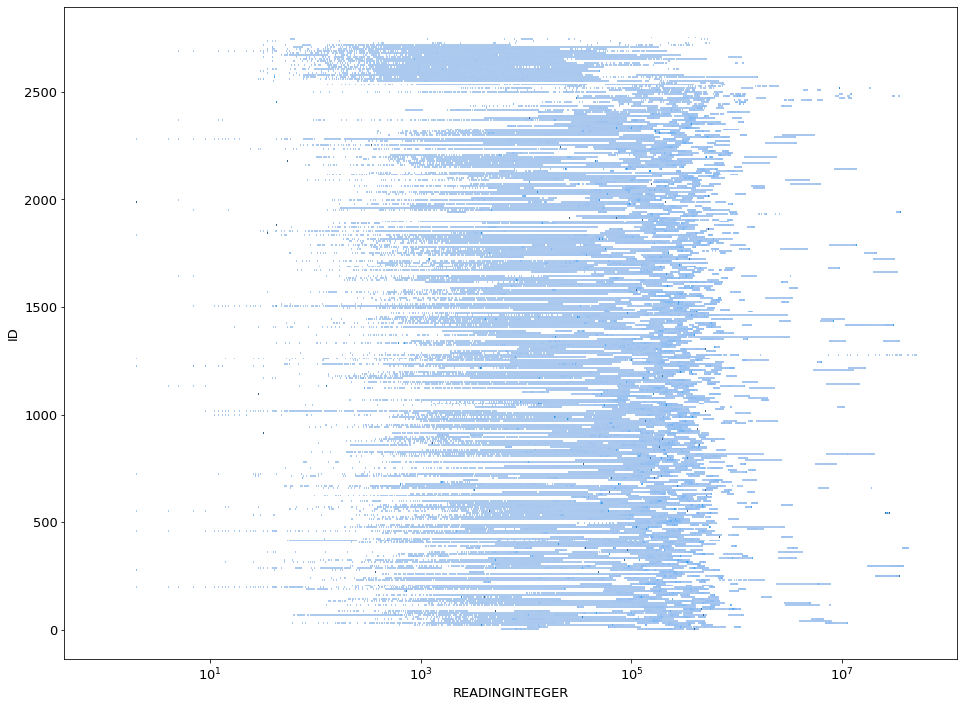

In [29]:
temp = df.copy()
temp = temp[temp["READINGINTEGER"] > 0]
temp["ID"] = temp["ID"] + 1
sns.histplot(temp, x="READINGINTEGER", y="ID", log_scale=(True, False))

<AxesSubplot:xlabel='DELTAINTEGER', ylabel='ID'>

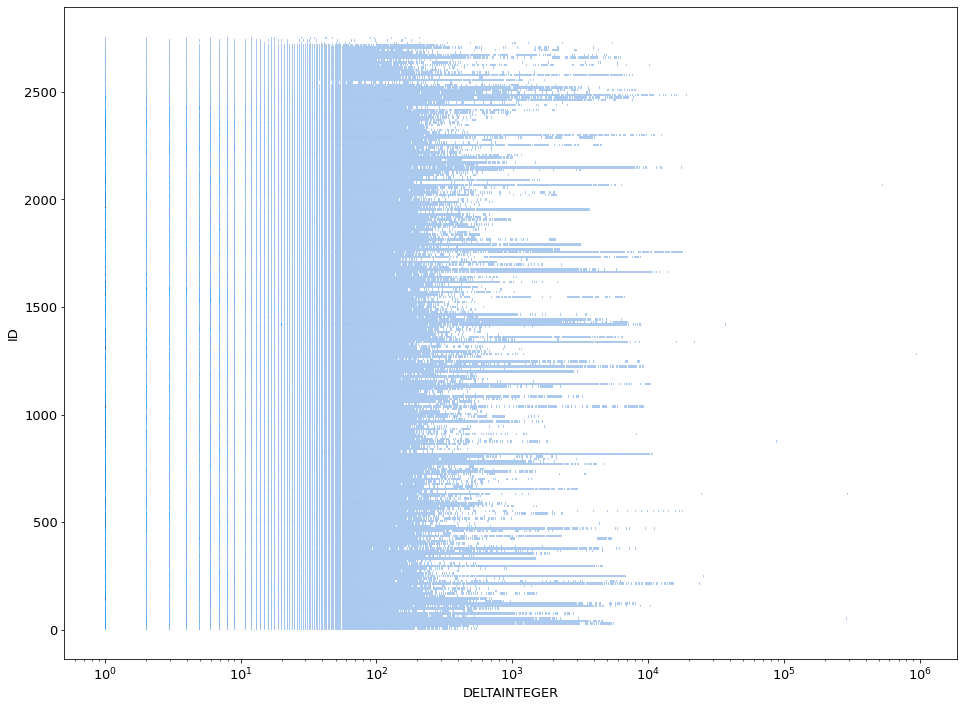

In [30]:
temp = df.copy()
temp = temp[temp["DELTAINTEGER"] > 0]
temp["ID"] = temp["ID"] + 1
sns.histplot(temp, x="DELTAINTEGER", y="ID", log_scale=(True, False))

<AxesSubplot:xlabel='SAMPLETIME', ylabel='READINGINTEGER'>

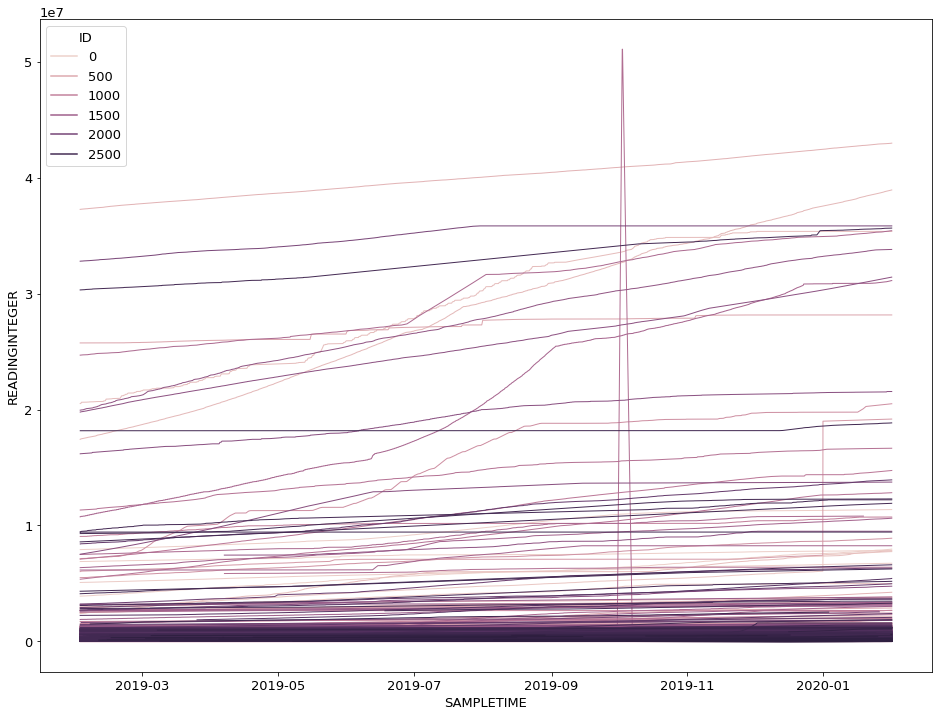

In [34]:
temp = df.copy()
temp = temp.sort_values(by="SAMPLETIME").reset_index()
sns.lineplot(x="SAMPLETIME", y="READINGINTEGER", hue="ID", data=temp, lw=1)

<br>
<br>
<br>

# ID-wise EDA

In [32]:
ID_sample = 215

<AxesSubplot:ylabel='DELTA'>

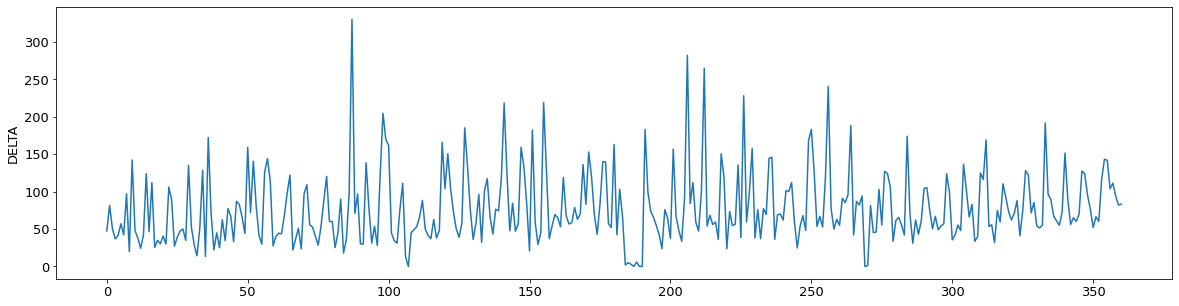

In [33]:
temp = df[df["ID"] == ID_sample].copy()
temp = temp.sort_values(by="SAMPLETIME").reset_index()
temp = temp.groupby(temp.index // 24).sum()
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
sns.lineplot(data=temp, y="DELTA", x=temp.index, ax=ax)

/home/user/.local/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


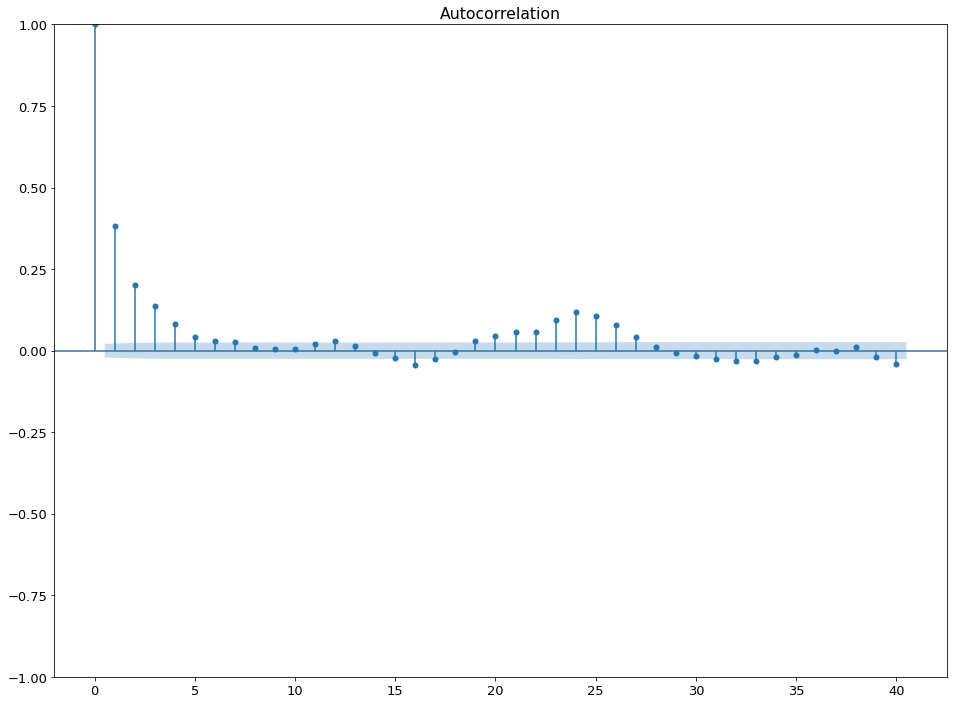

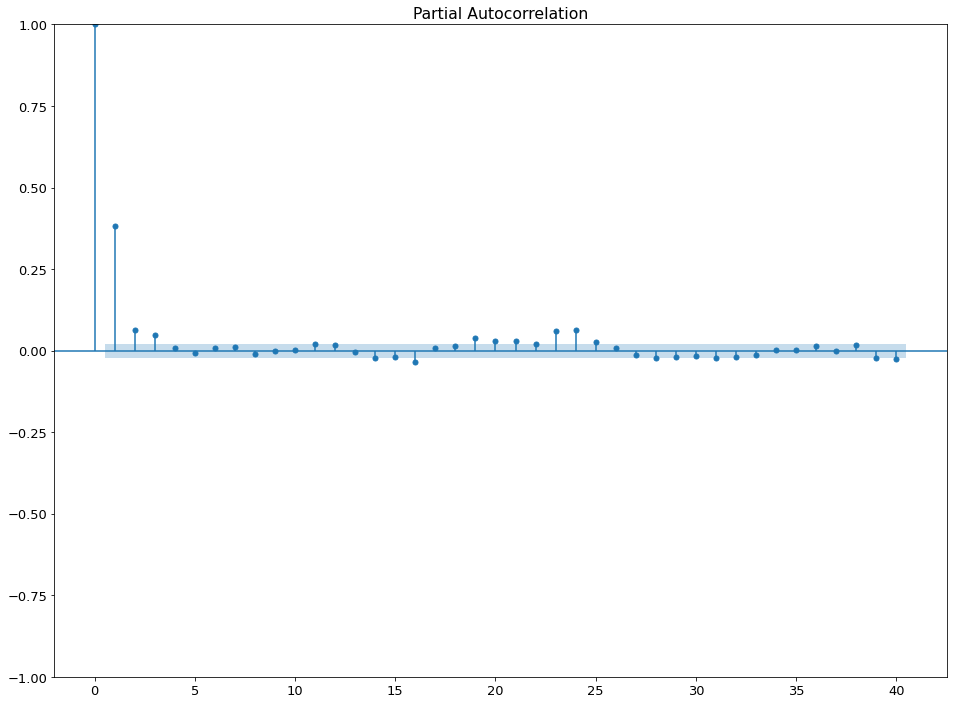

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

temp = df[df["ID"] == ID_sample].copy()
temp = temp.sort_values(by="SAMPLETIME").reset_index()

plot_acf(temp["DELTA"])
plot_pacf(temp["DELTA"])
pass

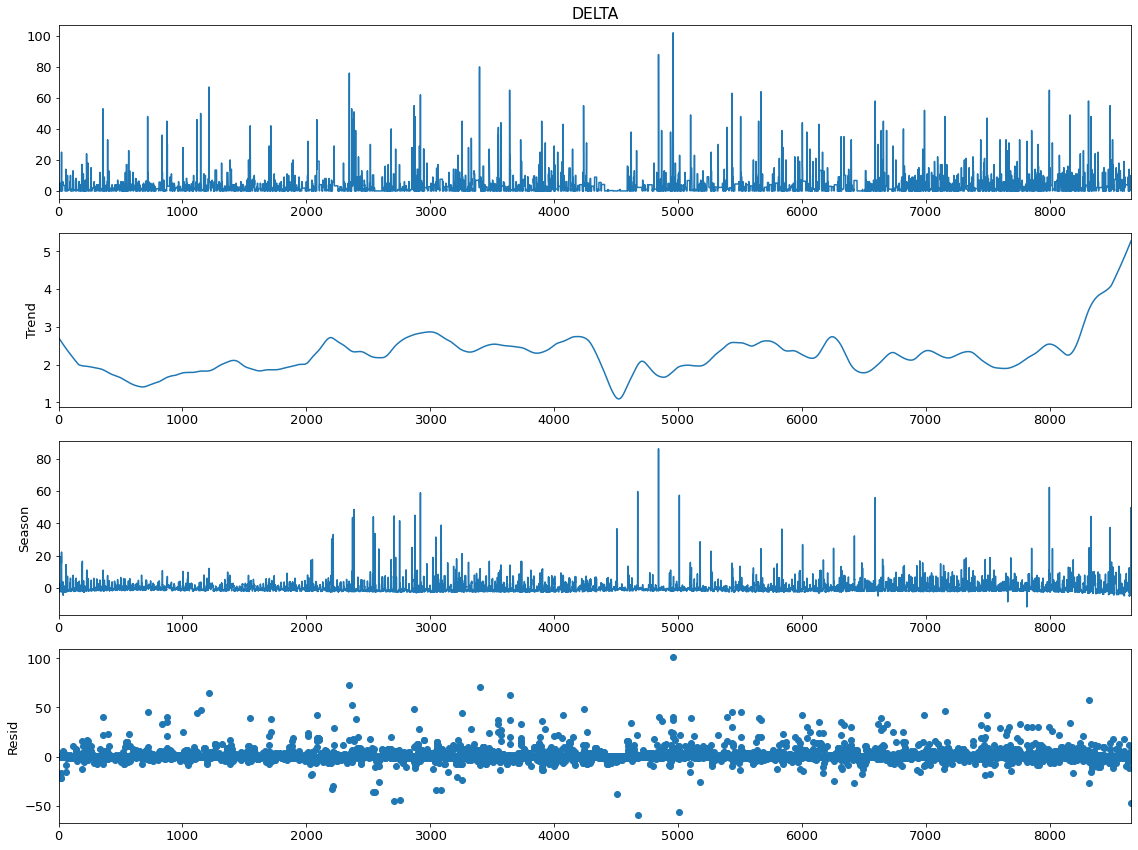

In [35]:
temp = df[df["ID"] == ID_sample].copy()
temp = temp.sort_values(by="SAMPLETIME").reset_index()

from statsmodels.tsa.seasonal import STL

stl = STL(temp.DELTA, period=24*7, robust=True)
res = stl.fit()
fig = res.plot()

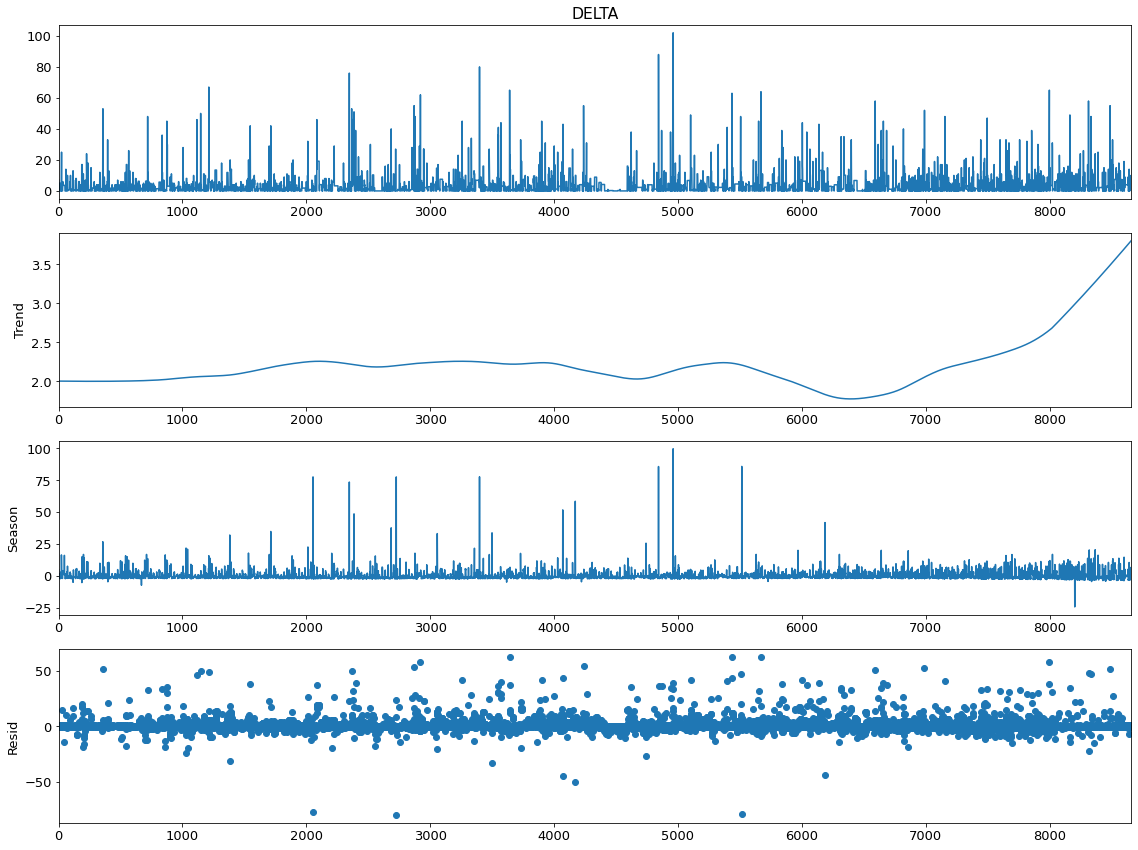

In [36]:
temp = df[df["ID"] == ID_sample].copy()
temp = temp.sort_values(by="SAMPLETIME").reset_index()

from statsmodels.tsa.seasonal import STL

stl = STL(temp.DELTA, period=24*7*4, robust=True)
res = stl.fit()
fig = res.plot()

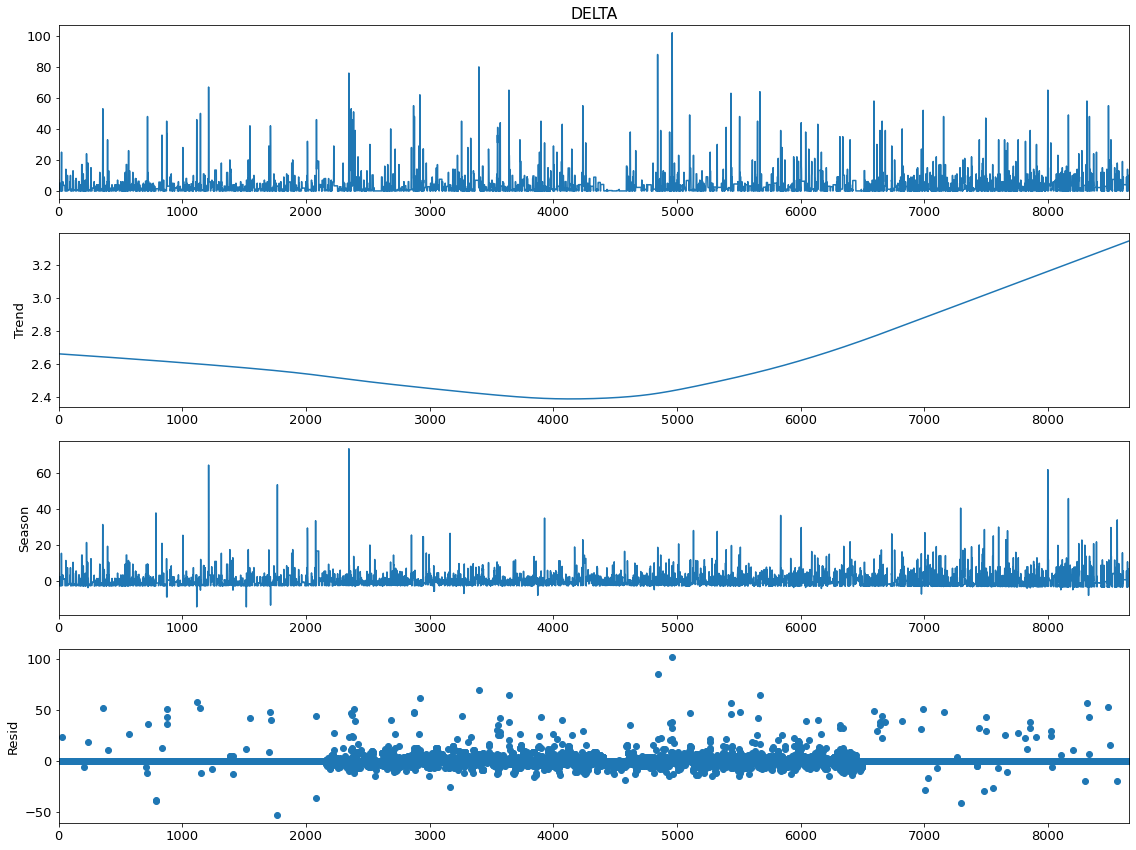

In [37]:
temp = df[df["ID"] == ID_sample].copy()
temp = temp.sort_values(by="SAMPLETIME").reset_index()

from statsmodels.tsa.seasonal import STL

stl = STL(temp.DELTA, period=24*30*3, robust=True)
res = stl.fit()
fig = res.plot()

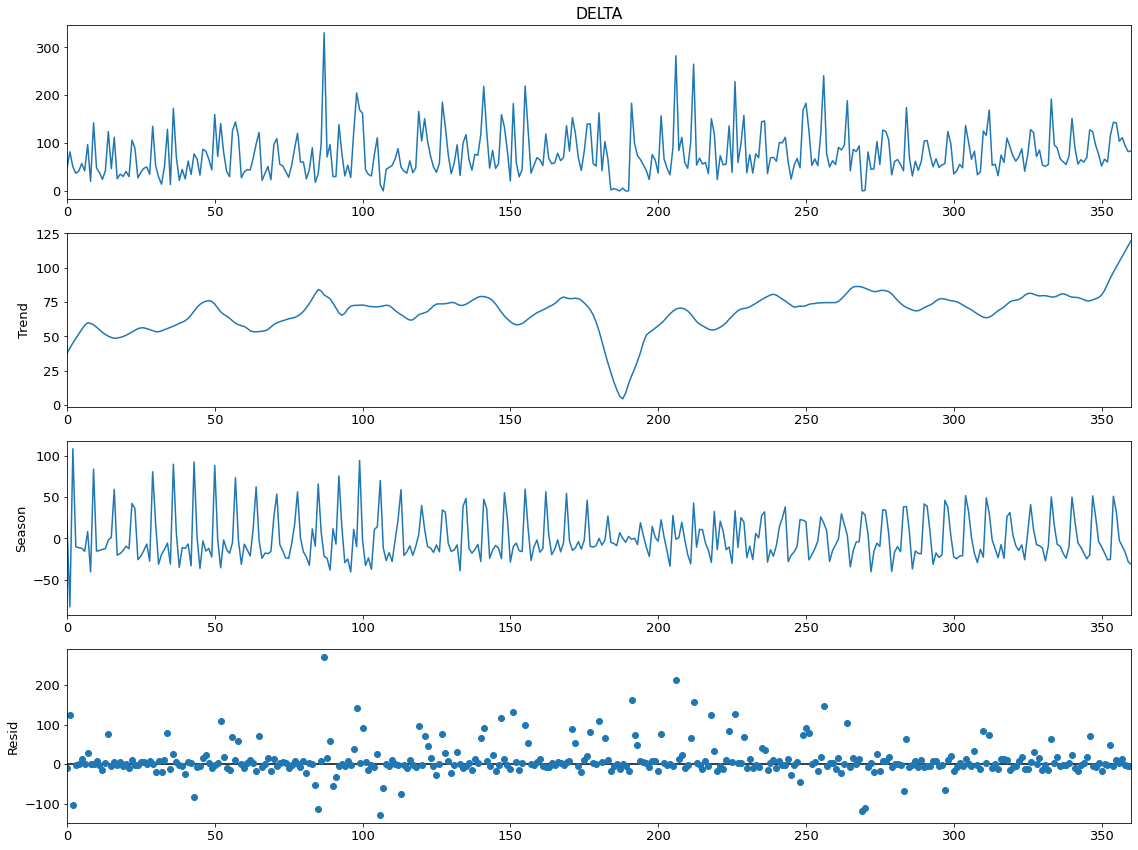

In [38]:
temp = df[df["ID"] == ID_sample].copy()
temp = temp.sort_values(by="SAMPLETIME").reset_index()
temp = temp.groupby(temp.index // 24).sum()

stl = STL(temp.DELTA, period=7, robust=True)
res = stl.fit()
fig = res.plot()

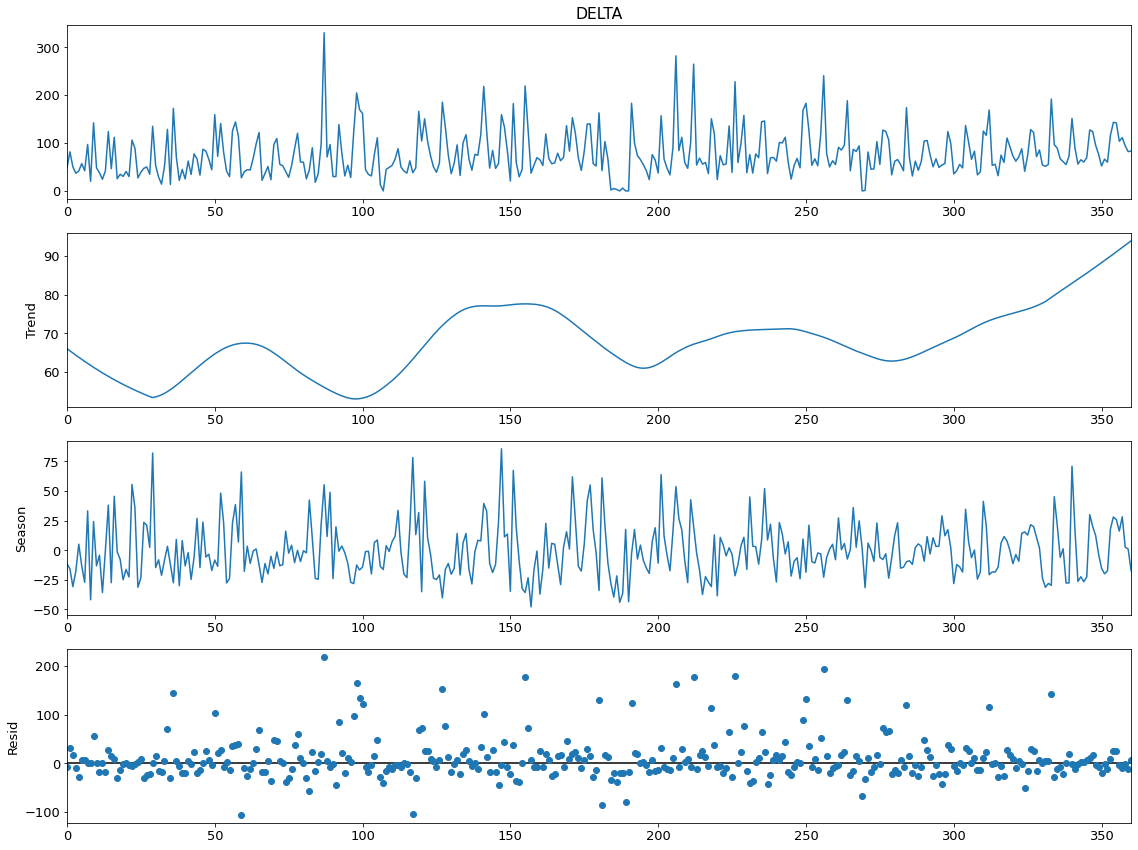

In [39]:
temp = df[df["ID"] == ID_sample].copy()
temp = temp.sort_values(by="SAMPLETIME").reset_index()
temp = temp.groupby(temp.index // 24).sum()

stl = STL(temp.DELTA, period=30, robust=True)
res = stl.fit()
fig = res.plot()

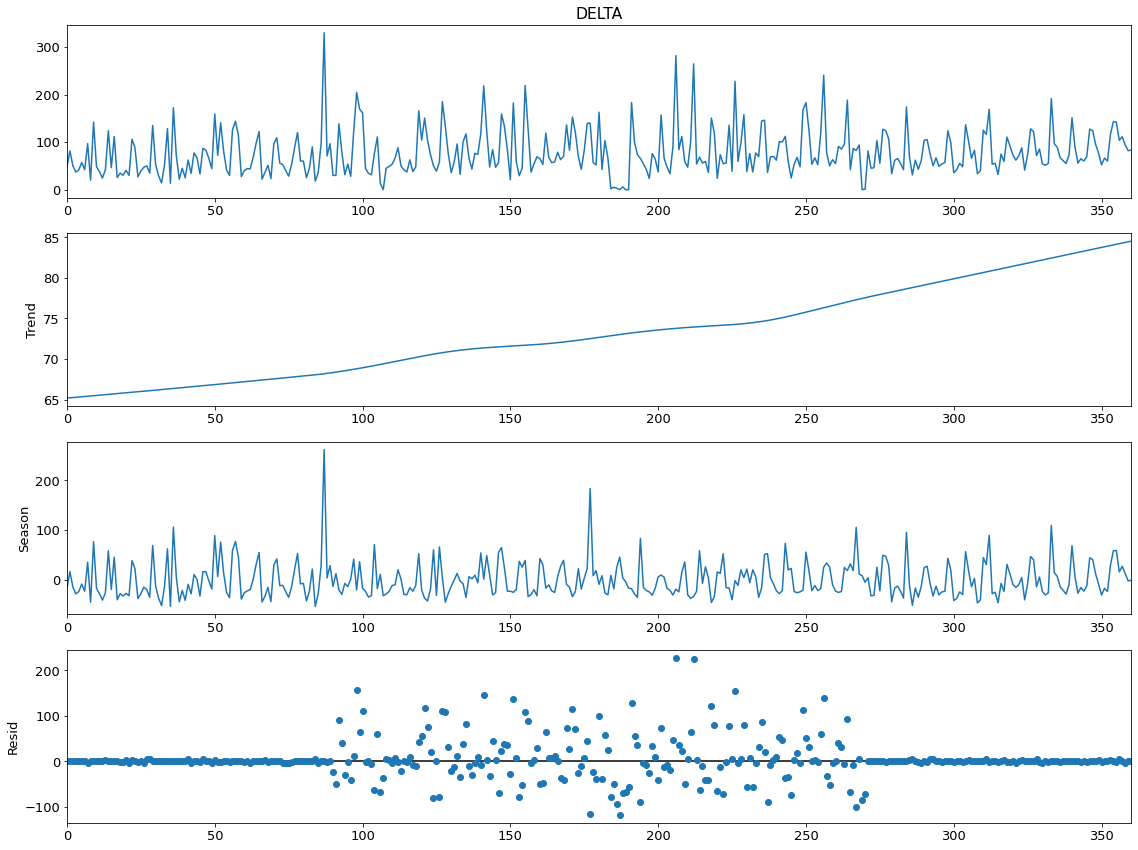

In [40]:
temp = df[df["ID"] == ID_sample].copy()
temp = temp.sort_values(by="SAMPLETIME").reset_index()
temp = temp.groupby(temp.index // 24).sum()

stl = STL(temp.DELTA, period=30*3, robust=True)
res = stl.fit()
fig = res.plot()

/home/user/.local/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


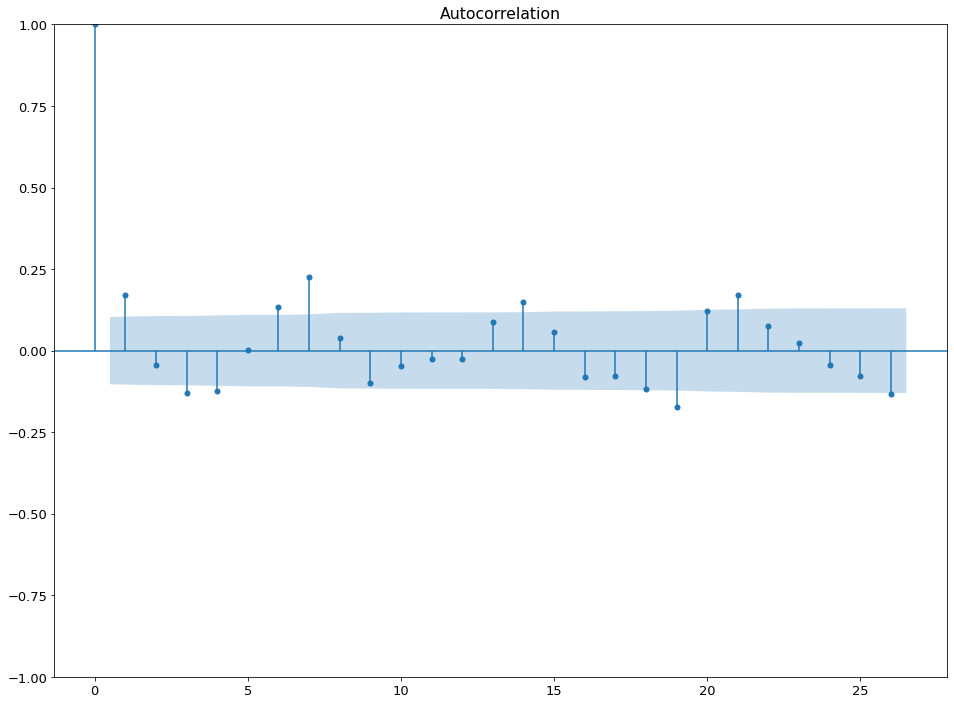

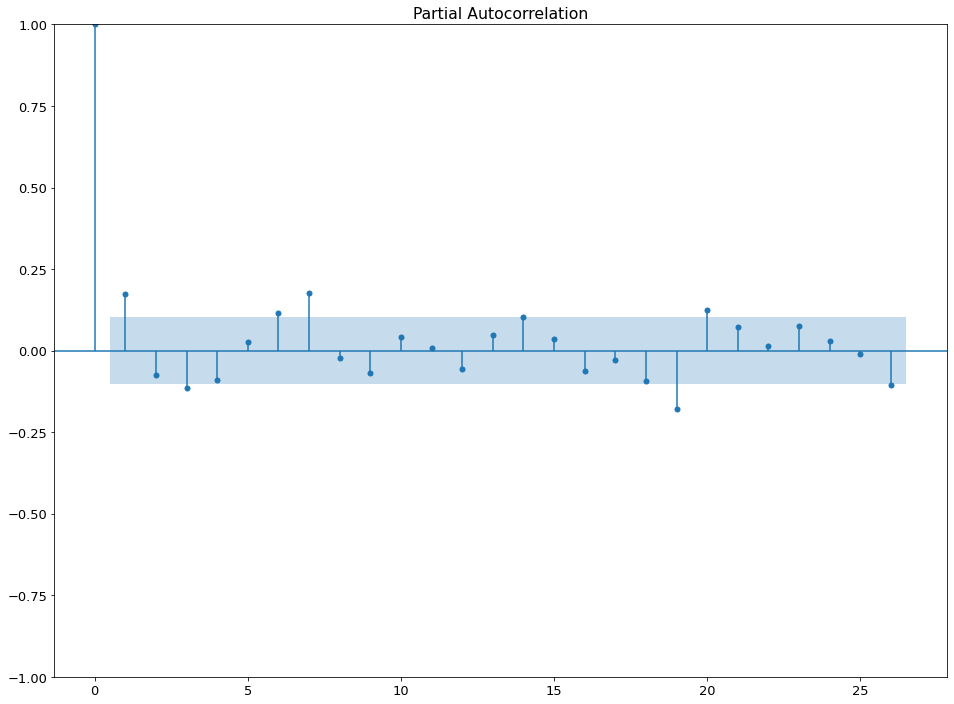

In [41]:
temp = df[df["ID"] == ID_sample].copy()
temp = temp.sort_values(by="SAMPLETIME").reset_index()
temp = temp.groupby(temp.index // 24).sum()

plot_acf(temp["DELTA"])
plot_pacf(temp["DELTA"])
pass

In [ ]:
# https://developer.nvidia.com/blog/three-approaches-to-encoding-time-information-as-features-for-ml-models/

<br>
<br>
<br>

# ID-wise file split

In [42]:
simplified_df = df.drop(["READINGINTEGER", "READINGTHOUSANDTH", "DELTAINTEGER", "DELTATHOUSANDTH"], axis=1)
simplified_df.head()

,ID,SAMPLETIME,READING,DELTA
0,0,2019-06-13 08:34:09+00:00,369320.0,17.0
1,0,2019-06-13 17:34:10+00:00,369403.0,2.0
2,0,2019-06-13 18:34:10+00:00,369403.0,0.0
3,0,2019-06-13 04:34:10+00:00,369284.0,1.0
4,0,2019-06-13 14:34:10+00:00,369356.0,28.0


In [43]:
for x in tqdm.tqdm(simplified_df["ID"].unique()):
    temp = simplified_df[simplified_df["ID"] == x]
    temp = temp.drop(["ID"], axis=1)
    temp = temp.sort_values(by="SAMPLETIME")
    temp.to_csv(os.path.join(data_folder, "water_meters/") + f"{str(x).zfill(4)}.csv", index=False)

100%|███████████████████████████████████████| 2747/2747 [02:30<00:00, 18.31it/s]


In [4]:
# TODO
def load_csv(folder, i, **kwargs):
    files = os.listdir(folder)
    temp = pd.read_csv(os.path.join(folder, files[i]), **kwargs)
    temp.drop(["Unnamed: 0", "user key"], axis=1, inplace=True)
    return temp